In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
# 加载数据集
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
old_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2] # 归一化和特征构造后都没有变化
# print("Data shape: {}".format(old_data.shape))


In [79]:
feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [80]:
data = pd.DataFrame(old_data,columns=feature_names)
data['TARGET'] = target

In [81]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [82]:
# 查看靠河影响,透视表
data.pivot_table(index='CHAS',values=['TARGET'])

,TARGET
CHAS,
0.0,22.093843
1.0,28.440000


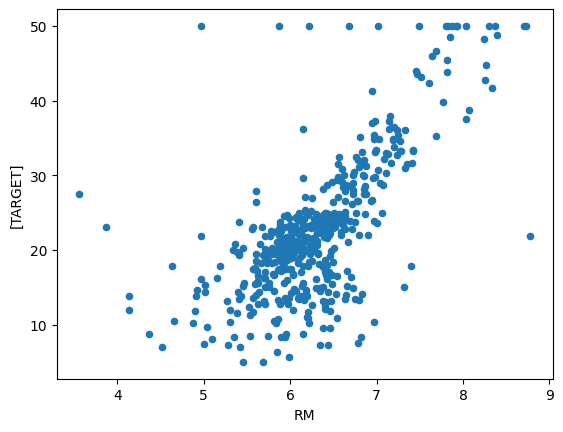

In [83]:
# 查看RM与目标值的关系
# 如果想使用一组数据训练线性模型，需要先查看这组特征与输出间关系是否是线性关系
data.plot.scatter(x='RM',y=['TARGET'])
plt.show()

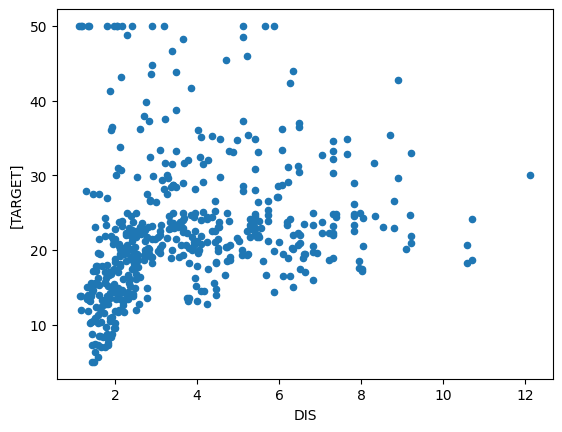

In [84]:
data.plot.scatter(x='DIS',y=['TARGET'])  # 离市中心距离
plt.show()

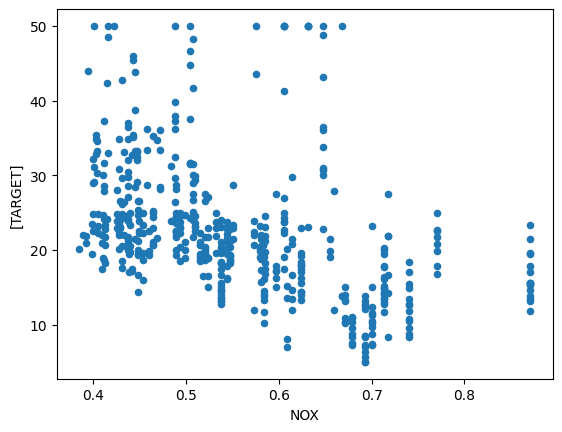

In [85]:
data.plot.scatter(x='NOX',y=['TARGET'])  # 空气质量
plt.show()

In [86]:
import sklearn.model_selection as ms  # 拆分测试集，训练集
import sklearn.linear_model as lm  # 线性回归模块
import sklearn.metrics as sm  # 评估模块
# 整理输入输出集
x, y =data.iloc[:,:-1], data['TARGET']

# 拆分测试集训练集
train_x, test_x, train_y, test_y = ms.train_test_split(x, y, test_size=0.2, random_state=22)

# 训练模型
model = lm.LinearRegression()
model.fit(train_x, train_y)

# 评估
pred_y = model.predict(test_x)
sm.r2_score(test_y,pred_y)

0.7657465943591124

**岭回归**

In [87]:
import sklearn.linear_model as lm
# 创建模型

# for i in range(1,1000):
model = lm.Ridge(0.01, fit_intercept=True, max_iter=1)  # 默认-1    
# 训练模型
# 输入为一个二维数组表示的样本矩阵
# 输出为每个样本最终的结果
model.fit(x, y)

# 预测输出
# 输入array是一个二维数组
rid_pred_y = model.predict(test_x)
print(sm.r2_score(test_y,rid_pred_y))

0.7941144753631537


**多项式回归**

In [88]:
# 使用sklearn提供的 数据管线 实现多项式回归

import sklearn.pipeline as pl
import sklearn.preprocessing as sp
import sklearn.linear_model as lm

# for i in range(1,1000):
model = pl.make_pipeline(
    sp.PolynomialFeatures(2),  # 多项式特征扩展器
    lm.LinearRegression()  # 线性回归器
)

model.fit(x, y)

# 预测输出
# 输入array是一个二维数组
pipe_pred_y = model.predict(test_x)
print(sm.r2_score(test_y,pipe_pred_y))

0.9465113657031128


**决策树**

0.8036282177347948
CRIM 0.011774626165027524
ZN 8.47676091076777e-05
INDUS 0.0031794468380113633
CHAS 0.0
NOX 0.02552824260244346
RM 0.282847470773951
AGE 0.0031503582090011742
DIS 0.08633470760443122
RAD 5.5208212173511866e-06
TAX 0.00812930904659372
PTRATIO 0.014370999835308537
B 0.003152148816254025
LSTAT 0.5614424016786529


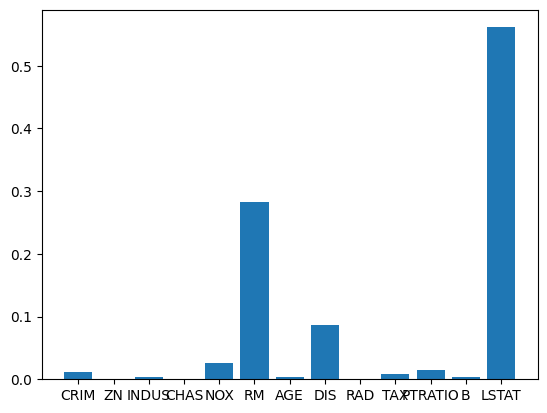

In [89]:
import sklearn.tree as st
# 训练模型
model = st.DecisionTreeRegressor(max_depth=7)
model.fit(train_x,train_y)

pred_tree_y = model.predict(test_x)
print(sm.r2_score(test_y,pred_tree_y))

# 单棵决策树的特征重要性
feat_imp=model.feature_importances_
      
feat_names=model.feature_names_in_

# 查看对应特征的重要性
for a,b in zip(model.feature_names_in_,model.feature_importances_):
    print(a,b)
    
    
plt.bar(feat_names,feat_imp)
plt.show()

**AdaBoost -- 集合模型**

0.8004340070177617
CRIM 0.03079214670968416
ZN 0.0012906008133627374
INDUS 0.005897599945381919
CHAS 0.0007641141239790425
NOX 0.0278082718642313
RM 0.2634902914831679
AGE 0.020877342239983478
DIS 0.10661996851868838
RAD 0.004589635214155426
TAX 0.020177325223057367
PTRATIO 0.017201223486794783
B 0.01385306899202036
LSTAT 0.486638411385493


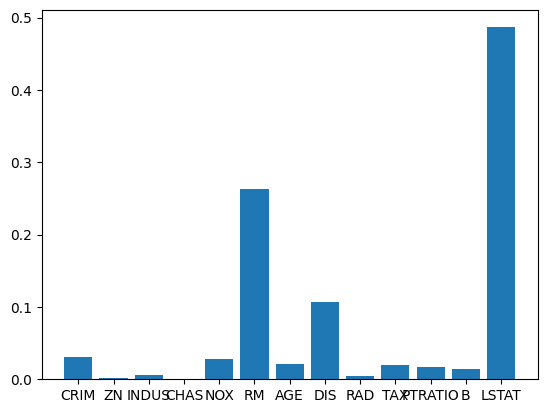

In [90]:
import sklearn.ensemble as se
# 构建一颗决策树
model = st.DecisionTreeRegressor(max_depth=7)
# 自适应增强决策树回归模型
# n_estimators：构建不同权重决策树的数量
model=se.AdaBoostRegressor(model,n_estimators=400,random_state=22)
# 训练模型
model.fit(train_x,train_y)
# 测试模型
pred_ada_y = model.predict(test_x)
# 评估
print(sm.r2_score(test_y,pred_ada_y))

# 多棵决策树的特征重要性
model.feature_importances_

# 多棵决策树的特征重要性
feat_imp=model.feature_importances_
      
feat_names=model.feature_names_in_

# 查看对应特征的重要性
for a,b in zip(model.feature_names_in_,model.feature_importances_):
    print(a,b)
    
    
plt.bar(feat_names,feat_imp)
plt.show()

**测试特征重要性**

In [91]:
# 特征重要性
# 决策树划分子表时所使用的特征先后顺序标志了对应特征的重要程度
model.feature_importances_

array([0.03079215, 0.0012906 , 0.0058976 , 0.00076411, 0.02780827,
       0.26349029, 0.02087734, 0.10661997, 0.00458964, 0.02017733,
       0.01720122, 0.01385307, 0.48663841])

**GBDT**

In [92]:
params_a = [5,6,7,8,9]
params_b = [3,5,7,9]

for a in params_a:
    for b in params_b:
        se.GradientBoostingRegressor(max_depth=a, 
                                    n_estimators=10,   # 弱模型数量，评估器
                                    random_state=22, 
                                    min_samples_split=b)  # 样本最小拆分数，若叶子结点样本数量小于该值，则不再拆分
        model.fit(train_x, train_y)
        pred_gbdt_y = model.predict(test_x)
        c = sm.r2_score(test_y,pred_gbdt_y)
        print('a:{}\tb:{}\t-->{}'.format(a,b,c))

a:5	b:3	-->0.8004340070177617
a:5	b:5	-->0.8004340070177617
a:5	b:7	-->0.8004340070177617
a:5	b:9	-->0.8004340070177617
a:6	b:3	-->0.8004340070177617
a:6	b:5	-->0.8004340070177617
a:6	b:7	-->0.8004340070177617
a:6	b:9	-->0.8004340070177617
a:7	b:3	-->0.8004340070177617
a:7	b:5	-->0.8004340070177617
a:7	b:7	-->0.8004340070177617
a:7	b:9	-->0.8004340070177617
a:8	b:3	-->0.8004340070177617
a:8	b:5	-->0.8004340070177617
a:8	b:7	-->0.8004340070177617
a:8	b:9	-->0.8004340070177617
a:9	b:3	-->0.8004340070177617
a:9	b:5	-->0.8004340070177617
a:9	b:7	-->0.8004340070177617
a:9	b:9	-->0.8004340070177617


**随机森林**

In [96]:
# 随机森林相关API
import sklearn.ensemble as se
# 随机森林回归模型（属于集合算法）
model = se.RandomForestRegressor(max_depth=9,
                                 n_estimators=100,
                                 min_samples_split=2)

model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))

0.8246833497808611
